In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data=pd.read_csv("HRA.csv", delimiter=",")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [64]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [65]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [66]:
data_left = data[data["left"]==1]

In [67]:
data_present = data[data["left"]==0]

In [68]:
data_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [85]:
left = data.groupby("left")
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


We can see that on average the employees who left the company has relatively low satisfaction level, low promotion rate

Also their average_monthly_hours and time_spend_company are more than who stay in the company now

In [70]:
projects=data.groupby('number_project').count()
projects

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
number_project,,,,,,,,,
2,2388,2388,2388,2388,2388,2388,2388,2388,2388
3,4055,4055,4055,4055,4055,4055,4055,4055,4055
4,4365,4365,4365,4365,4365,4365,4365,4365,4365
5,2761,2761,2761,2761,2761,2761,2761,2761,2761
6,1174,1174,1174,1174,1174,1174,1174,1174,1174
7,256,256,256,256,256,256,256,256,256


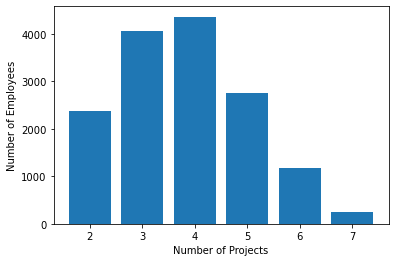

In [71]:
projects=data.groupby('number_project').count()
x = projects.index.values
y = projects['satisfaction_level']
plt.bar(x, y)
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

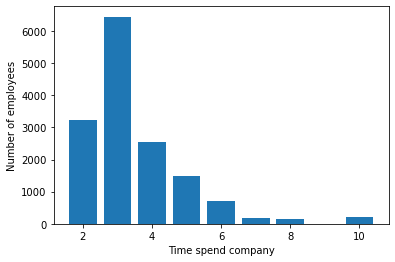

In [72]:
projects=data.groupby('time_spend_company').count()
x = projects.index.values
y = projects['satisfaction_level']
plt.bar(x, y)
plt.xlabel('Time spend company')
plt.ylabel('Number of employees')
plt.show()

In [86]:
left_count = data.groupby("left").count()
left_count

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


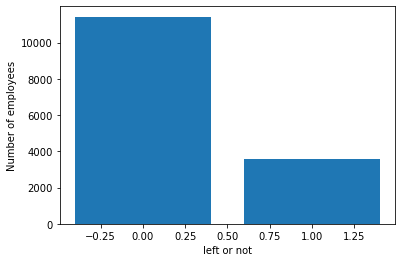

In [73]:
projects=data.groupby('left').count()
x = projects.index.values
y = projects['satisfaction_level']
plt.bar(x, y)
plt.xlabel('left or not')
plt.ylabel('Number of employees')
plt.show()

We can see that a total of 3571 emplyees left the company out of 15000, which is almost 23% of total number of employees present in the company

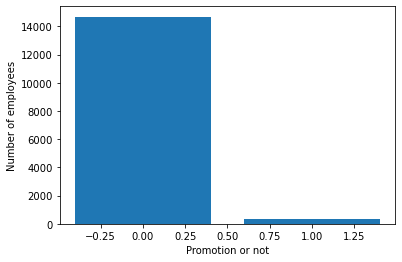

In [74]:
projects=data.groupby('promotion_last_5years').count()
x = projects.index.values
y = projects['satisfaction_level']
plt.bar(x, y)
plt.xlabel('Promotion or not')
plt.ylabel('Number of employees')
plt.show()

We can see that a very less number of people got promotion in the last 5 years

<AxesSubplot:xlabel='salary', ylabel='count'>

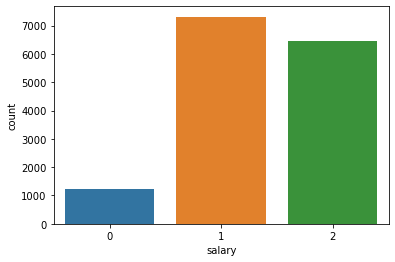

In [108]:
features=['salary']
sns.countplot(x=j,data = data)

We can see that many employees salary is either low or medium

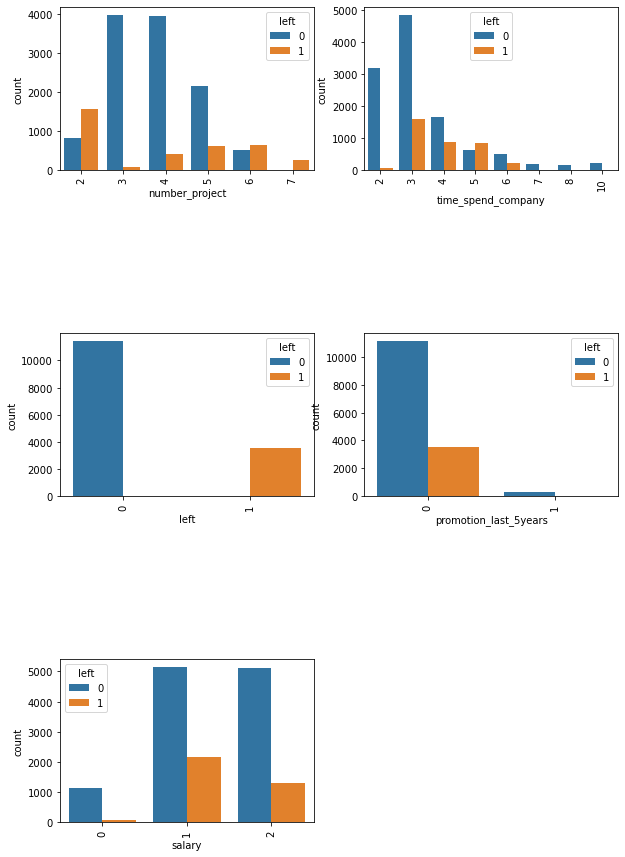

In [114]:
columns=['number_project','time_spend_company','left', 'promotion_last_5years','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(columns):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)


The employees with more than 5 projects were most likely to leave the job because they might have felt work pressure, from the above plot

We can see that most employees who leave the job are low or medium range salary employees

Employees are leaving the job if they dont get promotion for 5 years

In [112]:
#since sales and salary are categorical variables encode them to numeric values

label_encoder = LabelEncoder()
data['sales'] = label_encoder.fit_transform(data['sales'])
data['salary'] = label_encoder.fit_transform(data['salary'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


<AxesSubplot:>

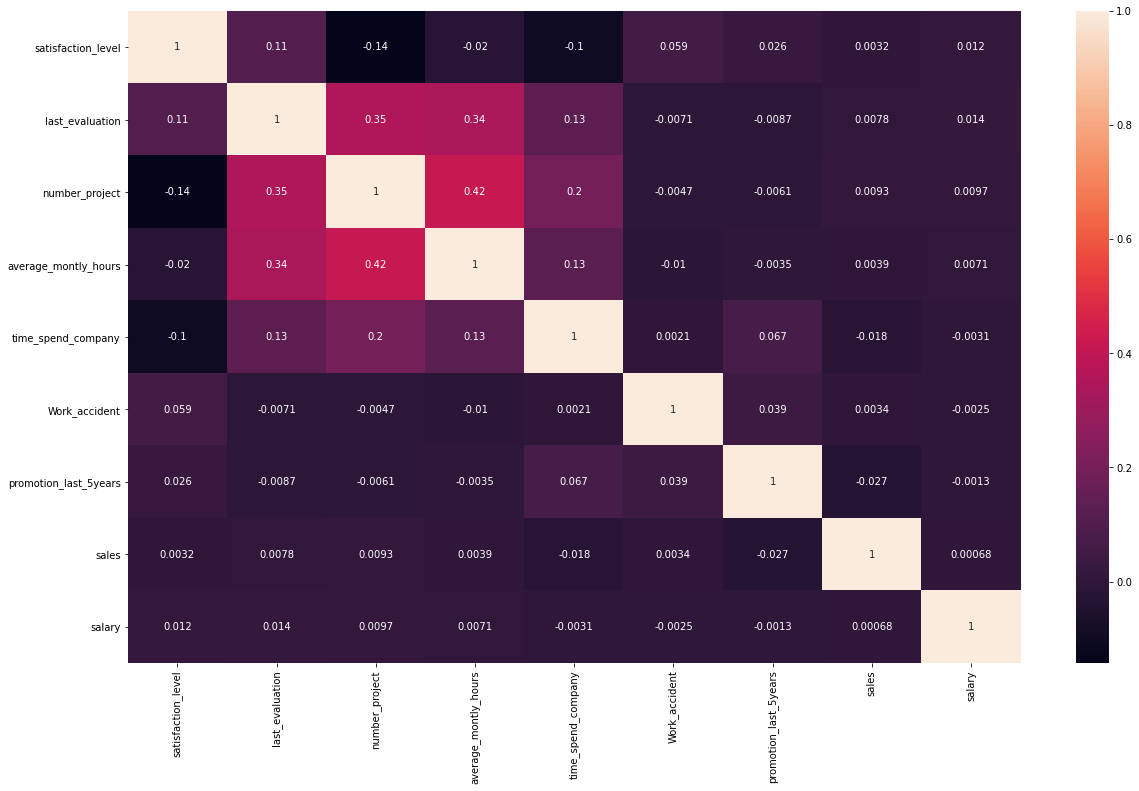

In [76]:
l=data.drop("left", axis=1)
corr=l.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.drop('left', axis=1)
y = data['left']

bestfeatures = SelectKBest(score_func=chi2, k="all")
bestfit=bestfeatures.fit(X,y)

scores=pd.DataFrame(bestfit.scores_)
columns=pd.DataFrame(X.columns)
col=["scores","feature"]
df=pd.concat([scores, columns],axis=1)
df.columns=col
df

,scores,feature
0,228.193183,satisfaction_level
1,0.026464,last_evaluation
2,3.390205,number_project
3,945.588933,average_montly_hours
4,191.708547,time_spend_company
5,306.737710,Work_accident
6,56.044865,promotion_last_5years
7,21.672355,sales
8,0.007297,salary


##### last_evealuation - In this feature selection model last_evaluation performance is very low hence we may neglect it when we are building the model to learn a better model.

In [116]:
# features and output
X = data.drop(['left'], axis=1)
y = data['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
from sklearn.linear_model import LogisticRegression
  
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
ypredict=model.predict(X_test)
print("Accuracy: ", model.score(X_test,y_test))
cross_tab = pd.crosstab(y_test,ypredict)
cross_tab

Accuracy:  0.7573333333333333


C:\Users\srima\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


col_0,0,1
left,,
0,2111,183
1,545,161


In [118]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train, y_train)
ypredict=model.predict(X_test)
print("Accuracy: ", model.score(X_test,y_test))
cross_tab = pd.crosstab(y_test,ypredict)
cross_tab

Accuracy:  0.9306666666666666


col_0,0,1
left,,
0,2151,143
1,65,641


In [119]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
ypredict=decision_tree_model.predict(X_test)
print("Accuracy: ", decision_tree_model.score(X_test,y_test))
cross_tab = pd.crosstab(y_test,ypredict)
cross_tab

Accuracy:  0.9756666666666667


col_0,0,1
left,,
0,2245,49
1,24,682


In [120]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
ypredict=model.predict(X_test)
print("Accuracy: ", model.score(X_test,y_test))
cross_tab = pd.crosstab(y_test,ypredict)
cross_tab

Accuracy:  0.9886666666666667


col_0,0,1
left,,
0,2286,8
1,26,680


In [122]:
# Feature Importance (for Decision Tree)
feature_importance = decision_tree_model.feature_importances_
columns = X.columns

# Sort feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = columns[sorted_indices]
print(sorted_feature_names)

Index(['satisfaction_level', 'last_evaluation', 'time_spend_company',
       'number_project', 'average_montly_hours', 'sales', 'salary',
       'Work_accident', 'promotion_last_5years'],
      dtype='object')
